Populating the interactive namespace from numpy and matplotlib


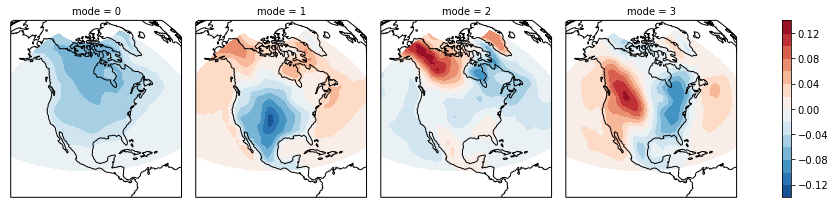

In [83]:
%pylab inline

import numpy as np
import xarray as xr
from xarray.tutorial import load_dataset
from gnl.xlearn import XPCA, XSVD
import cartopy.crs as ccrs


air  = load_dataset("air_temperature").air
w = np.cos(air.lat/360  * 2 *pi)
pca = XPCA(feature_dims=['lat', 'lon'], n_components=4, weights=w)
pca.fit(air.chunk())


fg = pca.components_.plot.contourf(levels=15, col='mode',transform=ccrs.PlateCarree(),
                     subplot_kws={'projection': ccrs.Orthographic(-100, 35)})

for ax in fg.axes.flat:
    ax.set_extent([-125, -66.5, 0, 90], ccrs.Geodetic())
    ax.coastlines()